In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [65]:
df = pd.read_csv("../data/student_data.csv", sep=',')

In [66]:
df

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,390,MS,M,20,U,LE3,A,2,2,services,...,no,no,5,5,4,4,5,4,11,9
353,391,MS,M,17,U,LE3,T,3,1,services,...,yes,no,2,4,5,3,4,2,3,16
354,392,MS,M,21,R,GT3,T,1,1,other,...,no,no,5,5,3,3,3,3,3,7
355,393,MS,M,18,R,LE3,T,3,2,services,...,yes,no,4,4,1,3,4,5,0,10


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   357 non-null    int64 
 1   school      357 non-null    object
 2   sex         357 non-null    object
 3   age         357 non-null    int64 
 4   address     357 non-null    object
 5   famsize     357 non-null    object
 6   Pstatus     357 non-null    object
 7   Medu        357 non-null    int64 
 8   Fedu        357 non-null    int64 
 9   Mjob        357 non-null    object
 10  Fjob        357 non-null    object
 11  reason      357 non-null    object
 12  guardian    357 non-null    object
 13  traveltime  357 non-null    int64 
 14  studytime   357 non-null    int64 
 15  failures    357 non-null    int64 
 16  schoolsup   357 non-null    object
 17  famsup      357 non-null    object
 18  paid        357 non-null    object
 19  activities  357 non-null    object
 20  nursery   

In [68]:
df["ImprovabilityScore"] = (df["goout"]+df["traveltime"]*1.25+df["Dalc"]+df["Walc"]+df["failures"]*1.25+df["absences"]/18.6-df["studytime"]*1.25-df["Medu"]-df["Fedu"]+6.535)/4

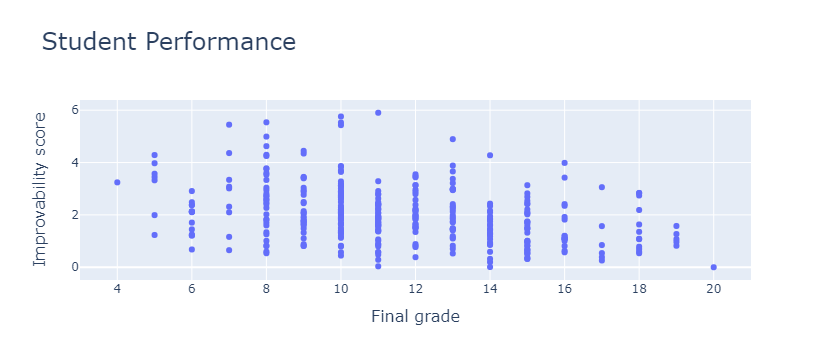

In [87]:
fig = go.Figure(data=[
    go.Scatter(
        y=df["ImprovabilityScore"], x=df['FinalGrade'], 
        mode="markers",
        text=df['StudentID'],
        hovertemplate=
            "<b>Student ID: %{text}</b><br><br>" +
            "Improvability score: %{y:.1f}<br>" +
            "Final grade: %{x:.f}<br>" 
    )
])
fig.update_layout(
    title={"text": "Student Performance", "font": {"size": 24}},
    xaxis={"title": {"text": "Final grade", "font": {"size": 16}}},
    yaxis={"title": {"text": "Improvability score", "font": {"size": 16}}}
)
fig.show()